# 'Reproducing' the Third Figure from the Lunch Talk (No Multiplicity, No Additional IFMR)
In this test notebook, I will examine the code that should create the juxtaposed KLF's of stars from the Galacitc Center and from their MIST and BPASS cluster counterparts. Final product should be similar to Figure 1 in Lu et al. 2013.

Firstly, I grab some code from the  jlu_python/jlu/papers/lu_gc_imf.py directory in the Moving Universe Lab's computers.

In [1]:
# After spending a bit of time figuring out how pickling files and loading works
# I have finally done it.

# These come from 
import pickle
import sys
from spisea import evolution

class dat:
    datin = "Container of Data"

def load_klf_by_radius(rmin=0, rmax=30, mask_for_log=False):
    pickleFile = ('%sklf_r_%.1f_%.1f.dat' %
                  ('/Users/jlu/work/gc/imf/klf/current/', rmin, rmax))
    _in = open(pickleFile, 'rb')
    d = dat()
    d.Kp = pickle.load(_in,encoding='bytes')
    d.N = pickle.load(_in, encoding='bytes')
    d.eN = pickle.load(_in, encoding='bytes')

    d.N_ext = pickle.load(_in, encoding='bytes')
    d.eN_ext = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')

    d.KLF = pickle.load(_in, encoding='bytes')
    d.eKLF = pickle.load(_in, encoding='bytes')

    d.KLF_ext = pickle.load(_in,
                            encoding='bytes')
    d.eKLF_ext = pickle.load(_in,
                             encoding='bytes')

    d.KLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_im = pickle.load(_in,
                                      encoding='bytes')
    d.eKLF_ext_cmp_sp_im = pickle.load(_in,
                                       encoding='bytes')

    d.N_noWR = pickle.load(_in, encoding='bytes')
    d.eN_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eN_ext_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_noWR = pickle.load(_in,
                                      encoding='bytes')
    d.eN_ext_cmp_sp_noWR = pickle.load(_in,
                                       encoding='bytes')

    d.N_ext_cmp_sp_im_noWR = pickle.load(_in,
                                         encoding='bytes')
    d.eN_ext_cmp_sp_im_noWR = pickle.load(_in,
                                          encoding='bytes')

    d.KLF_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_noWR = pickle.load(_in,
                                        encoding='bytes')
    d.eKLF_ext_cmp_sp_noWR = pickle.load(_in,
                                         encoding='bytes')

    d.KLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                           encoding='bytes')
    d.eKLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                            encoding='bytes')

    d.comp_spec_ext = pickle.load(_in, encoding='bytes')
    d.comp_imag_ext = pickle.load(_in, encoding='bytes')

    if mask_for_log:
        # Repair for zeros since we are plotting in semi-log-y
        d.eN = np.ma.masked_where(d.N <= 0, d.eN)
        d.N = np.ma.masked_where(d.N <= 0, d.N)

        d.eN_ext = np.ma.masked_where(d.N_ext <= 0, d.eN_ext)
        d.N_ext = np.ma.masked_where(d.N_ext <= 0, d.N_ext)

        d.eN_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                             0, d.eN_ext_cmp_sp)
        d.N_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                            0, d.N_ext_cmp_sp)

        d.eN_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                                0, d.eN_ext_cmp_sp_im)
        d.N_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                               0, d.N_ext_cmp_sp_im)
        
        d.eKLF = np.ma.masked_where(d.KLF <= 0, d.eKLF)
        d.KLF = np.ma.masked_where(d.KLF <= 0, d.KLF)
        
        d.eKLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                        d.eKLF_ext)
        d.KLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                       d.KLF_ext)
        
        d.eKLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                               d.eKLF_ext_cmp_sp)
        d.KLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                              d.KLF_ext_cmp_sp)
        
        d.eKLF_ext_cmp_sp_im = (np.ma.
                                masked_where(d.KLF_ext_cmp_sp_im <=
                                             0, d.eKLF_ext_cmp_sp_im))
        d.KLF_ext_cmp_sp_im = (np.ma.
                               masked_where(d.KLF_ext_cmp_sp_im <=
                                            0, d.KLF_ext_cmp_sp_im))


    _in.close()

    return d

The following line loads data from /Users/jlu/work/gc/imf/klf/current/klf_r_0.0_30.0.dat. Recall I use the noWR option as the corresponding figure 

In [2]:
import numpy as np
result = load_klf_by_radius(mask_for_log=True)
result.KLF_ext_cmp_sp_im_noWR
magBin = result.Kp[1] - result.Kp[0]
idx = np.where(result.Kp < 16)[0]

Now, I create the BPASS isochrone for that specific age. $10^{6.78}$ years of age (around 6 million years). From that isochrone, I will create a cluster using an IMF of $\alpha = 1.7$.

In [3]:
from spisea import synthetic
BPASS_iso = synthetic.Isochrone_Binary(6.78, 2.7,
                                       8000, 0.0, filters=['nirc2,Kp'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1794: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=3.50 for T= 26935 logg=3.29
Changing to T= 50000 for T= 50518 logg=3.84
Changing to logg=5.00 for T= 50518 logg=3.84
Changing to T= 50000 for T=168628 logg=5.83
Changing to logg=5.00 for T=168628 logg=5.83
Changing to logg=3.50 for T= 27821 logg=3.39
Changing to T= 50000 for T=166073 logg=5.80
Changing to logg=5.00 for T=166073 logg=5.80
Changing to T= 50000 for T=162596 logg=5.78
Changing to logg=5.00 for T=162596 logg=5.78
Changing to logg=3.00 for T= 23226 logg=2.95
Changing to T= 50000 for T=169071 logg=5.83
Changing to logg=5.00 for T=169071 logg=5.83
Changing to T= 50000 for T=166855 logg=5.80
Changing to logg=5.00 for T=166855 logg=5.80
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=143840 logg=5.56
Changing to logg=5.00 for T=143840 logg=5.56
Changing to T= 50000 for T=113794 logg=5.39
Changing to logg=5.00 for T=113794 logg=5.39
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.

In [4]:
from spisea import imf, ifmr
import numpy as np
# If we want to use control group, let's use multiplicity = None.
custom_IMF = imf.imf.IMF_broken_powerlaw(np.array([1, 150]),
                                         np.array([-1.7]),
                                         multiplicity=None)
import time
t1 = time.time()
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None)
t2 = time.time()
t_time = t2 - t1

Then, I create the scaling factor we use to turn number of stars in a magnitude bin
to area (arcsecond^2) density of stars in a magnitude bin.

In [5]:
area = 150  # arcsec^2
# Think of how many stars per area would there be in a similar cluster
# but with lower mass. We use scaling.
scaleFactorBPS = ((17000 /
                  1e6)/
                  area)
print(scaleFactorBPS)

0.00011333333333333334


In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual BPASS stars' magnitudes (not necessarily just of star systems)

In [6]:
totl_BPASS = (BPASS_Cluster.star_systems['m_nirc2_Kp']
               [np.where((BPASS_Cluster.star_systems['isWR']==0))[0]])

Below, I produce my first plot that demonstrates the problem with BPASS's IMF. I also set up bins and BPASS weights, which I will use in the next figure.

Text(0.5, 1.0, 'KLF of clusters at Age = 6 Myr')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


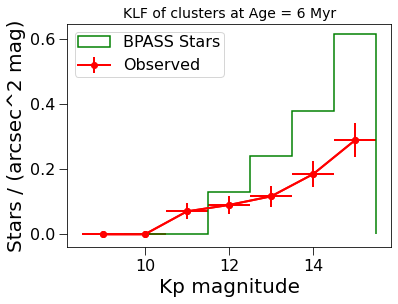

In [7]:
import matplotlib.pyplot as py
# Primary star fluxes
klf_mag_bins = np.arange(9.0, 17, 1.0)
binsKp = klf_mag_bins
binEdges = binsKp[0:-1] + (binsKp[1:] - binsKp[0:-1]) / 2.0

weightsBPS = np.array([1.0 for x in totl_BPASS])
weightsBPS *= scaleFactorBPS
(n1, b1, p1) = py.hist(totl_BPASS, bins=binEdges, weights=weightsBPS,
                       histtype='step', color='green',
                       label='BPASS Stars', align='mid',
                       linewidth=1.5)
py.errorbar(result.Kp[idx],
            result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, linewidth=2)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
            label='Observed')
py.legend(loc='upper left', numpoints=1)
py.xlabel('Kp magnitude')
py.ylabel('Stars / (arcsec^2 mag)')
py.title('KLF of clusters at Age = %d Myr' % (10**(6.78 - 6)),
         fontsize=14)

**Now I create the MIST v1 cluster and then make the final figure of the talk.**

In [8]:
from spisea import evolution
MIST_iso = synthetic.IsochronePhot(6.78, 2.7, 8000, 0.0, recomp=False,
                                   filters=['nirc2,Kp'])
MIST_Cluster = synthetic.ResolvedCluster(MIST_iso, custom_IMF,
                                         1000000,
                                         ifmr=None)
Merged_iso = synthetic.IsochronePhot(6.78, 2.7, 8000, 0.0,
                                     evo_model=evolution.MergedBaraffePisaEkstromParsec(),
                                     recomp=False,
                                     filters=['nirc2,Kp'])
Merged_Cluster = synthetic.ResolvedCluster(Merged_iso, custom_IMF,
                                         1000000,
                                         ifmr=None)

Found 7210 stars out of mass range
Changing to logg=4.00 for T= 31067 logg=3.97
Changing to logg=4.00 for T= 31096 logg=3.97
Changing to logg=4.00 for T= 31275 logg=3.95
Changing to logg=4.00 for T= 31449 logg=3.93
Changing to logg=4.00 for T= 31630 logg=3.91
Changing to logg=4.00 for T= 31637 logg=3.91
Changing to logg=4.00 for T= 31732 logg=3.89
Changing to logg=4.00 for T= 31842 logg=3.87
Changing to logg=4.00 for T= 31945 logg=3.85
Changing to logg=4.00 for T= 32004 logg=3.84
Changing to logg=4.00 for T= 32026 logg=3.83
Changing to logg=4.00 for T= 32077 logg=3.81
Changing to logg=4.00 for T= 32137 logg=3.79
Changing to logg=4.00 for T= 32188 logg=3.77
Changing to logg=4.00 for T= 32211 logg=3.76
Changing to logg=4.00 for T= 32218 logg=3.75
Changing to logg=4.00 for T= 32233 logg=3.73
Changing to logg=4.00 for T= 32240 logg=3.71
Changing to logg=4.00 for T= 32255 logg=3.68
Changing to logg=4.00 for T= 32263 logg=3.67
Changing to logg=4.00 for T= 32270 logg=3.66
Changing to logg=4.0

In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual MIST stars' magnitudes (not necessarily just of star systems)

In [9]:
totl_mist =(MIST_Cluster.star_systems['m_nirc2_Kp']
            [np.where((MIST_Cluster.star_systems['isWR'] == 0))[0]])
totl_Merged = (Merged_Cluster.star_systems['m_nirc2_Kp']
              [np.where((Merged_Cluster.star_systems['isWR'] == 0))[0]])
# Now find the magintudes of just the primary star

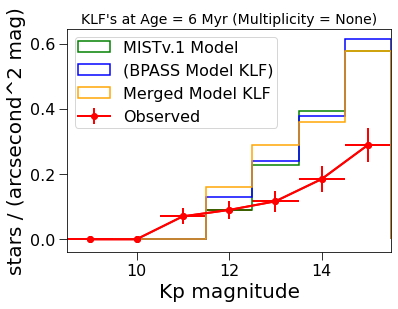

In [10]:
import matplotlib.pyplot as py

# Setting up framework so that I can scale the number of stars in mass bin
# into density: number of stars per square arcsecond.

# I won't be using the sum of initial masses of only existing stars for
# the scale factors

mist_scale = scaleFactorBPS
merged_scale = scaleFactorBPS

weightsMST = np.array([1.0 for x in totl_mist])
weightsMST *= mist_scale
# Binning the K' magnitudes into their respective bins
weights_Merged = np.array([1.0 for x in totl_Merged])
weights_Merged *= merged_scale

py.hist(totl_mist, bins=binEdges, histtype='step',
        weights=weightsMST, color='green', label='MISTv.1 Model',
        align='mid', linewidth=1.5)
py.hist(totl_BPASS, bins=binEdges, histtype='step',
        weights=weightsBPS, color='blue',
        label='(BPASS Model KLF)',
        align='mid', linewidth=1.5)
py.hist(totl_Merged, bins=binEdges, histtype='step',
        weights=weights_Merged, color='orange',
        label='Merged Model KLF',
        align='mid', linewidth=1.5)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, capsize=0, linewidth=2)
py.errorbar(result.Kp[idx],result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
       label='Observed')
py.xlim(8.5, 15.5)
py.xlabel('Kp magnitude')
py.ylabel("stars / (arcsecond^2 mag)")
py.title("KLF's at Age = %d Myr (Multiplicity = None)" % (10**(6.78 - 6)), fontsize=14)
py.legend(loc='upper left', numpoints=1)
py.savefig("BadSinglesKLF.png")

Now what could be bloating the KLF? It could be the actual cluster mass which is about half of what it should be. Not surprisingly this could contribute arithmetically to an increase of the KLF. **Note that masses from now on shall be in units of solar mass.**

In [11]:
BPASS_Cluster.star_systems['systemMass'].sum()

1000026.501249888

In [12]:
BPASS_Cluster.intended_singles_mass

1000026.501249888

In [13]:
BPASS_Cluster.star_systems['mass'].sum()

1000026.501249888

Similar issue applies to the MIST single star models: it's actual cluster mass is much less than I want it to be

In [14]:
MIST_Cluster.star_systems['mass'].sum()

535152.4922156556

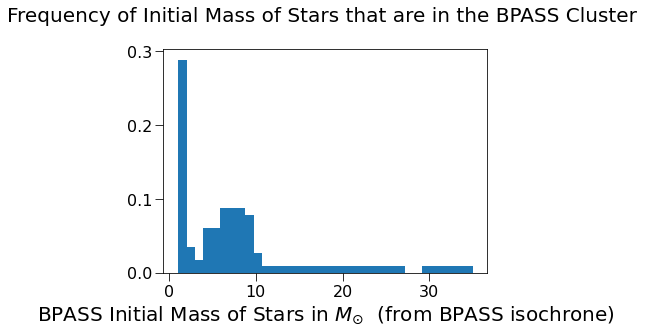

In [15]:
py.hist(BPASS_iso.singles['mass'], bins = 35, density = True)
py.xlabel("BPASS Initial Mass of Stars in $M_{\odot}$  (from BPASS isochrone)")
py.title("Frequency of Initial Mass of Stars that are in the BPASS Cluster \n")
py.savefig("Matchable.png")